Import tensorflow and disable v2

In [1]:
#Importing packages
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


Define the Hyperparameter & Data info

In [2]:
#Learning Rate, Iterations, Batch Size - Hyperparameters
learning_rate = 0.0001
iterations = 40000
batch_size = 256
dropout = 0.5

Load CIFAR-10 Data

In [3]:
#CIFAR-10 Dataset has 60000 images of common objects, 6k images per class and 10 classes in total
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
#Convert to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#One hot encoding of labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

#Normalization of images
X_train = X_train / 255.
X_test = X_test / 255.

#Reshape to [None, 3072] = 32 * 32 * 3
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

Function to shuffle and return data batch-wise

In [5]:
#Function to randomly sample the data in batches
def next_batch(num, data, labels):
    '''
    Input - num, batch size
            data, train data instances
            labels. train data labels
    Returns - np arrays of data and labels
    '''    
    i = np.arange(0 , len(data))
    np.random.shuffle(i)
    i = i[:num]
    data_shuffle = [data[j] for j in i]
    labels_shuffle = [labels[j] for j in i]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

Create placeholders for Input(X) and Output(Y)

In [6]:
#Define the placeholders for holding Input and Output Instances
#Here shape is [None, 784], where None means any number of  examples can be passed and 3072 stands for 32 * 32 * 3
X = tf.placeholder(tf.float32, shape = [None, 3072])
#Here shape is [None, 10], where 10 represents number of output classes
Y = tf.placeholder(tf.float32, shape = [None, 10])
#Dropout
keep_prob = tf.placeholder(tf.float32)

Define the weight matrices

In [7]:
#Defining the weights of 2 hidden layers and output layer
w1 = tf.Variable(tf.truncated_normal([3072, 1024], stddev = 0.1))
w2 = tf.Variable(tf.truncated_normal([1024, 512], stddev = 0.1))
w3 = tf.Variable(tf.truncated_normal([512, 256], stddev = 0.1))
w4 = tf.Variable(tf.truncated_normal([256, 128], stddev = 0.1))
w5 = tf.Variable(tf.truncated_normal([128, 10], stddev = 0.1))

Define the bias 

In [8]:
#Defining the bias of 2 hidden layers and output layer
b1 = tf.Variable(tf.constant(0, shape = [1024], dtype = tf.float32))
b2 = tf.Variable(tf.constant(0, shape = [512], dtype = tf.float32))
b3 = tf.Variable(tf.constant(0, shape = [256], dtype = tf.float32))
b4 = tf.Variable(tf.constant(0, shape = [128], dtype = tf.float32))
b5 = tf.Variable(tf.constant(0, shape = [10], dtype = tf.float32))

Setup the model flow

In [9]:
#Setting the flow -> Input -> L1 -> A1 -> L2 -> A2 -> L3 -> A3 -> L4 -> A4 -> Output
A1 = tf.nn.relu(tf.matmul(X, w1) + b1)
A2 = tf.nn.relu(tf.matmul(A1, w2) + b2)
drop_1 = tf.nn.dropout(A2, keep_prob)
A3 = tf.nn.relu(tf.matmul(A2, w3) + b3)
drop_2 = tf.nn.dropout(A3, keep_prob)
A4 = tf.nn.relu(tf.matmul(A3, w4) + b4)
drop_3 = tf.nn.dropout(A4, keep_prob)
Yhat = tf.nn.softmax(tf.matmul(A4, w5) + b5)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Define the cost function

In [10]:
#Cost function definition, using the softmax cross entropy loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Yhat, labels = Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Metrics to check predictions

In [11]:
#To verify the predictions
pred = tf.equal(tf.argmax(Yhat, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

Put it all together

In [12]:
#Setup the optimizer function with learning rate as parameter
train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(cross_entropy)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instantiate the tensorflow global variables -> Graph

In [13]:
#Initialize the Tensorflow Session and global varibales (Get it ready to spawn a Computational Graph)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Let's train for 40000 iterations

In [14]:
#Run the for-loop for a well defined number of epochs
s = time.clock()
loss = []
accuracy1 = []

for i in range(iterations + 1):

    X_train1, Y_train1 = next_batch(256, X_train, Y_train)

    #Generate the Computational Graph and train the network
    sess.run(train_step, feed_dict={X: X_train1, Y: Y_train1, keep_prob: dropout})

    #Print step and cost values at end of every 100th step
    if i % 2000 == 0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: X_train1, Y: Y_train1, keep_prob: 1.0})

        print('Iteration = {}'.format(i))
        print('Loss = {}'.format(minibatch_loss))
        print('Accuracy = {}\n'.format(minibatch_accuracy))

        loss.append(minibatch_loss)
        accuracy1.append(minibatch_accuracy)


e = time.clock()

print('Time Elapsed = {} \n'.format(e-s))

#Calculate and print the test accuracy
test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: Y_test, keep_prob: 1.0})
print('Accuracy on Test Set is {}'.format(test_accuracy))

C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Iteration = 0
Loss = 2.354729413986206
Accuracy = 0.08203125

Iteration = 2000
Loss = 1.9824023246765137
Accuracy = 0.48046875

Iteration = 4000
Loss = 1.9457130432128906
Accuracy = 0.5234375

Iteration = 6000
Loss = 1.9200767278671265
Accuracy = 0.546875

Iteration = 8000
Loss = 1.8442003726959229
Accuracy = 0.62890625

Iteration = 10000
Loss = 1.7589325904846191
Accuracy = 0.7109375

Iteration = 12000
Loss = 1.7923362255096436
Accuracy = 0.68359375

Iteration = 14000
Loss = 1.7735782861709595
Accuracy = 0.69140625

Iteration = 16000
Loss = 1.723045825958252
Accuracy = 0.74609375

Iteration = 18000
Loss = 1.726906657218933
Accuracy = 0.74609375

Iteration = 20000
Loss = 1.6800949573516846
Accuracy = 0.78125

Iteration = 22000
Loss = 1.7240188121795654
Accuracy = 0.73828125

Iteration = 24000
Loss = 1.712839961051941
Accuracy = 0.75390625

Iteration = 26000
Loss = 1.7020514011383057
Accuracy = 0.76171875

Iteration = 28000
Loss = 1.7051270008087158
Accuracy = 0.75390625

Iteration = 30

C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Accuracy on Test Set is 0.48080000281333923


Plotting the graphs - Accuracy & Loss

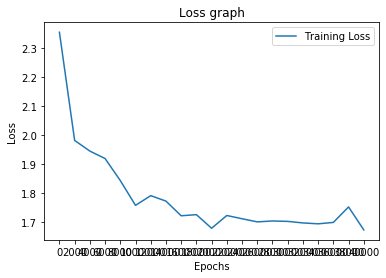

In [15]:
#Loss Graph
iterations = np.arange(0, 40001, 2000)
plt.plot(iterations, loss, label = 'Training Loss')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 40001, 2000))
plt.ylabel('Loss')
plt.legend()
plt.show()

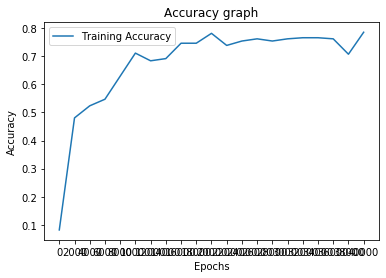

In [16]:
#Accuracy Graph
iterations = np.arange(0, 40001, 2000)
plt.plot(iterations, accuracy1, label = 'Training Accuracy')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 40001, 2000))
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Real Time Predictions

In [17]:
#User defined function for making predictions
def predict(index):
    '''
    Input - Number, which is treated as an index pointing to data in test set
    Returns - None

    Output - Predictions with display of the test Image  
    '''
    labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    
    a = sess.run(tf.argmax(Yhat, 1), feed_dict={X: [X_test[index]], keep_prob: 1.0})
    print('Model Prediction is {}'.format(labels[a[0]]))
    print('Ground Truth is {}'.format(labels[np.argmax(Y_test[index])]))


    plt.imshow(X_test[index].reshape(32, 32, 3))

Model Prediction is Dog
Ground Truth is Dog


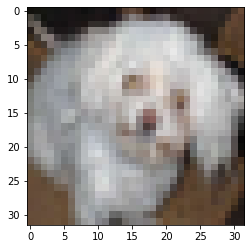

In [18]:
predict(1000)

Model Prediction is Truck
Ground Truth is Truck


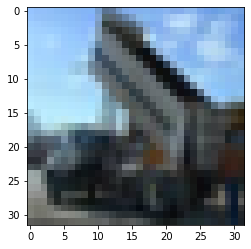

In [19]:
predict(50)

Model Prediction is Automobile
Ground Truth is Automobile


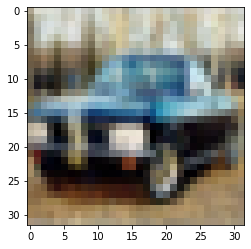

In [20]:
predict(1500)